# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import urllib.request

X = pd.read_csv('X_train.csv')
y = pd.read_csv('y_train.csv')

print(X.shape)
print(X.columns)
print(y.columns)


(85751, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')


# Standard Input and Train-Test Spilt

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc_x = StandardScaler()
X = sc_x.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)

(68600, 8)
(17151, 8)


# Nystroem Transform
* Nystroem Transform is a method of kernel_approximation, it can help linear model learn non-linear data
* After Nystroem Transform, the variance of error curve significantly reduce as shown below

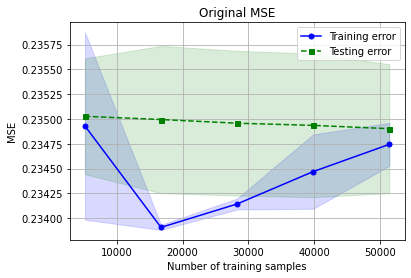

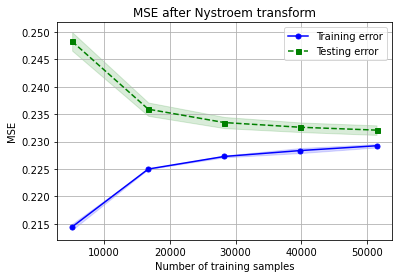

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.kernel_approximation import Nystroem
def mse(model, X, y):
    return ((model.predict(X) - y)**2).mean()
def accuracy_score(model, X, y):
    return (abs((model.predict(X)<0.5).astype(int) - y)).mean()

train_sizes, train_scores, test_scores = learning_curve(estimator=LinearRegression(), X=X_train, y=y_train.values.ravel(), scoring=mse, cv = 4)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
    color='blue', marker='o',
    markersize=5,
    label='Training error')
plt.fill_between(train_sizes,
    train_mean+train_std,
    train_mean-train_std,
    alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=5,
    label='Testing error')
plt.fill_between(train_sizes,
    test_mean+test_std,
    test_mean-test_std,
    alpha=0.15, color='green')

plt.title("Original MSE")
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('MSE')
plt.legend(loc='upper right')
plt.show()

# Nystroem transform
feature_map_nystroem = Nystroem(gamma=.2, random_state=1, n_components=300)
X_train_Nystroem = feature_map_nystroem.fit_transform(X_train)
train_sizes, train_scores, test_scores = learning_curve(estimator=LinearRegression(), X=X_train_Nystroem, y=y_train.values.ravel(), scoring=mse, cv = 4)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
    color='blue', marker='o',
    markersize=5,
    label='Training error')
plt.fill_between(train_sizes,
    train_mean+train_std,
    train_mean-train_std,
    alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=5,
    label='Testing error')
plt.fill_between(train_sizes,
    test_mean+test_std,
    test_mean-test_std,
    alpha=0.15, color='green')

plt.title("MSE after Nystroem transform")
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('MSE')
plt.legend(loc='upper right')
plt.show()

# Compare Different ML model
* Before training, use **RANSACRegressor** to eliminate extrene data
* Use the **learning curve** to plot samples with **MSE** and **Accuracy**
* set parameter **cv=4** to do **4-fold Cross-Validation**
* The **accuracy** of different models are similar, around **0.59~0.62**
* **Linear Rression** has the **lowest MSE 0.23**
* The Last model I use Neural Network(MLPClassifier) to see if non-linear model can outperform linear model. However the result is similiar. 
* We can see all model don't have the problem of overfit because the Training MSE and Cross-validation MSE converge to each other when samples increase
* For the Bias, other models has a larger Bias than Linear Regression model, because Linear Regression has the lowest converge MSE 0.23

   Linear Regression


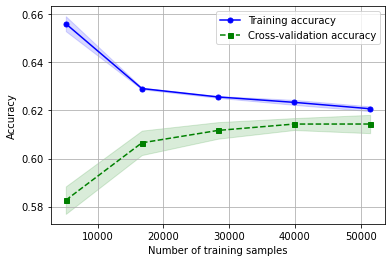

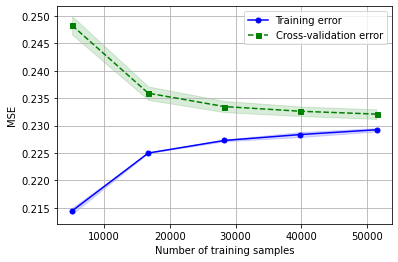

-----------------------------------------------------
   Logistic Regression


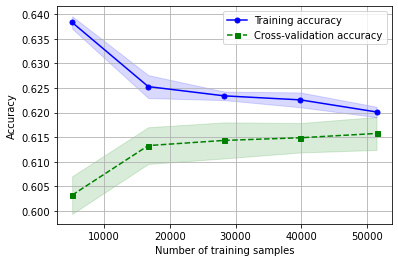

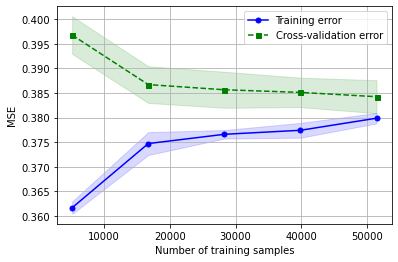

-----------------------------------------------------
   GaussianNB


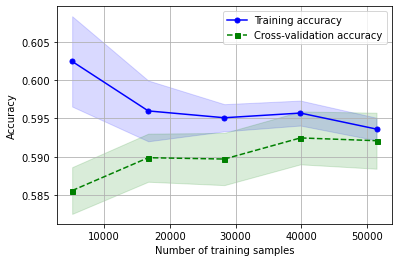

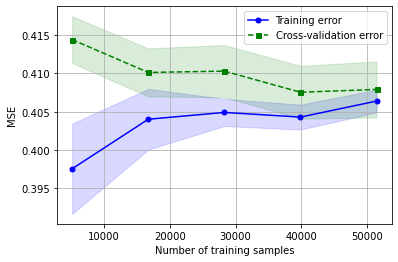

-----------------------------------------------------
   Linear SVC


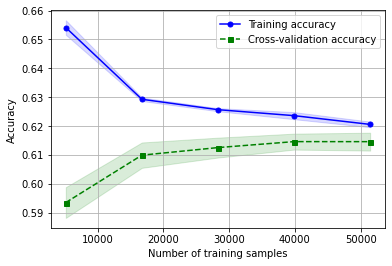

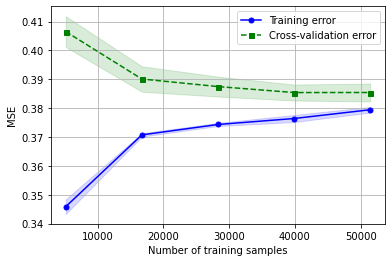

-----------------------------------------------------
   SGDClassifier


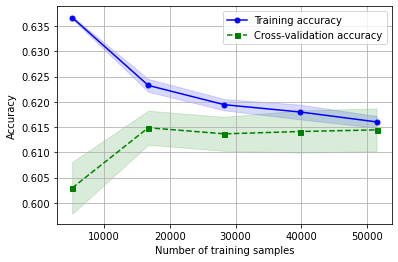

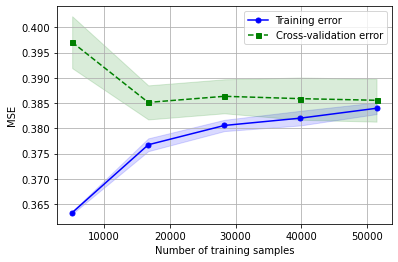

-----------------------------------------------------
   DecisionTreeClassifier


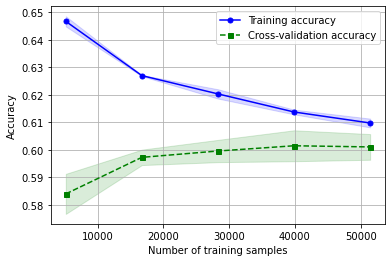

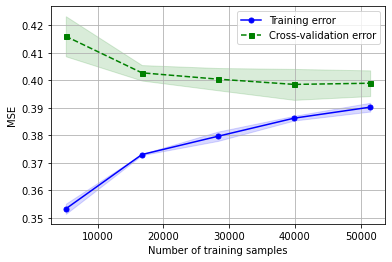

-----------------------------------------------------
   RandomForestClassifier


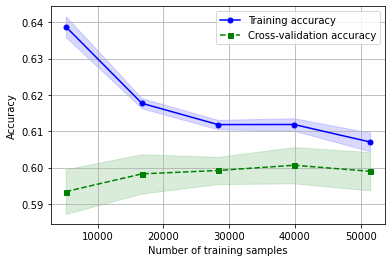

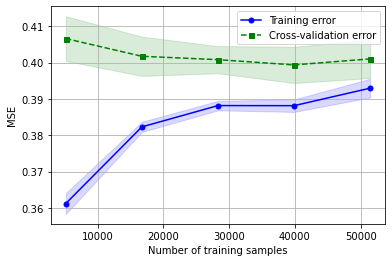

-----------------------------------------------------
   MLPClassifier


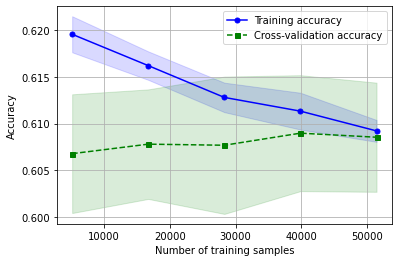

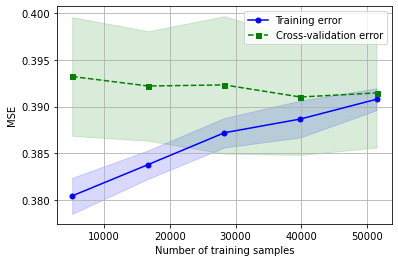

-----------------------------------------------------


In [6]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

def mse(model, X, y):
    return ((model.predict(X) - y)**2).mean()
def accuracy_score(model, X, y):
    return (abs((model.predict(X)<0.5).astype(int) - y)).mean()

names = [
    "Linear Regression",
    "Logistic Regression",
    "GaussianNB",
    "Linear SVC",
    "SGDClassifier",
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "MLPClassifier", # Neural Network
]

classifiers = [
    LinearRegression(),
    LogisticRegression(tol = 1e-3, max_iter = 1e4),
    GaussianNB(),
    LinearSVC(tol=1e-3, max_iter=10000),
    SGDClassifier(max_iter=10000, tol=1e-3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
]
for name, classifier in zip(names, classifiers):
    print("   " + name)
    # RANSACRegressor to delete extreme data
    model = RANSACRegressor(classifier, 
                max_trials=100, 
                min_samples=50, 
                residual_threshold=16.0, 
                random_state=0)
    train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train_Nystroem, y=y_train.values.ravel(), scoring=accuracy_score, cv = 4)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean,
        color='blue', marker='o',
        markersize=5,
        label='Training accuracy')
    plt.fill_between(train_sizes,
        train_mean+train_std,
        train_mean-train_std,
        alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='Cross-validation accuracy')
    plt.fill_between(train_sizes,
        test_mean+test_std,
        test_mean-test_std,
        alpha=0.15, color='green')

    #plt.title("Accuracy")
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
    
    #MSE
    train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train_Nystroem, y=y_train.values.ravel(), scoring=mse, cv = 4)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean,
        color='blue', marker='o',
        markersize=5,
        label='Training error')
    plt.fill_between(train_sizes,
        train_mean+train_std,
        train_mean-train_std,
        alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='Cross-validation error')
    plt.fill_between(train_sizes,
        test_mean+test_std,
        test_mean-test_std,
        alpha=0.15, color='green')
    
    #plt.title("Mean Square Error")
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('MSE')
    plt.legend(loc='upper right')
    plt.show()
    print("-----------------------------------------------------")


# Do Grid Search on Dicision Tree
* In the previous part, our **best model is Linear** 
* check if Decision Tree can outperform Linear Regression after Grid Search
* the **MSE is still higer than Linear Regression**, so I will still choose Linear Regression as my model in the following steps

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_depth': [3, 4, 5], 'splitter': ('best', 'random'), 'max_features': [2, 3, 4], 'criterion': ('gini', 'entropy')},
]

model = DecisionTreeClassifier()

grid_search = GridSearchCV(model, param_grid, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(X_train_Nystroem, y_train)

grid_search.best_params_
print(grid_search.best_estimator_)
print(grid_search.best_score_)

DecisionTreeClassifier(max_depth=5, max_features=4)
-0.40677842565597666


# Features Selection by LASSO and Ridge
* set a=0.01, if a larger than 0.01, weight of LASSO will be all 0
* Features [2,4,5,7] are outstanding feature of LASSO
* Features [2,3,4,5,7] are outstanding feature of Ridge

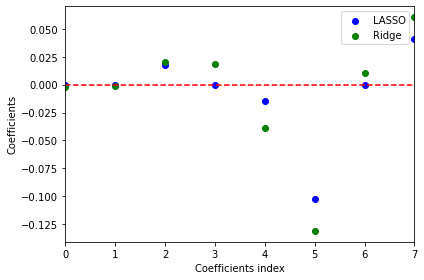

In [9]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

var_num = X_train.shape[1]

lr_lasso = Lasso(alpha = 0.01)
lr_lasso.fit(X_train, y_train)
y_train_pred = lr_lasso.predict(X_train)
y_test_pred = lr_lasso.predict(X_test)

lr_ridge = Ridge(alpha = 0.01)
lr_ridge.fit(X_train, y_train)
y_train_pred = lr_ridge.predict(X_train)
y_test_pred = lr_ridge.predict(X_test)

plt.scatter(range(var_num),lr_lasso.coef_, label = 'LASSO', color = 'blue')
plt.scatter(range(var_num),lr_ridge.coef_, label = 'Ridge', color = 'green')
plt.hlines(y=0, xmin=0, xmax=var_num-1, color='red', linestyle ='--')
plt.xlim(0,7)
plt.legend(loc = 'upper right')
plt.xlabel('Coefficients index')
plt.ylabel('Coefficients')
plt.tight_layout()
plt.show()

# Features Selection by ExtraTreesClassifier
* Feature[1,2,4,5,7] are outstanding feature

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train, y_train.values.ravel())
print(model.feature_importances_)

[0.04889033 0.17732853 0.17318553 0.05977538 0.15917807 0.19832924
 0.00977856 0.17353436]


# Training after Features Selection
* select **Features [4,5,7]** because they are  intersection of three Features Selection method above
* I don't use Nystroem Transform here because I found that it isn't suitable for low-rank data
* I choose **Linear Regression** as my final model because it has the lowest MSE
* I don't do Grid Search on Linear Regression because it has no hyper-parameters
* The result is a little worser than before Features Selection 

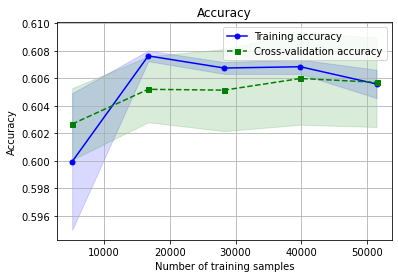

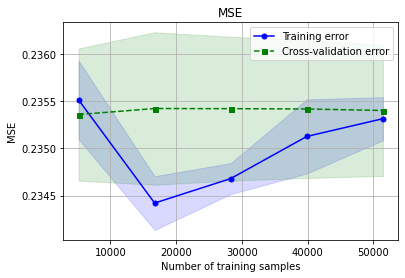

In [17]:
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
def accuracy_score(model, X, y):
    return (abs((model.predict(X)<0.5).astype(int) - y)).mean()
X_train_pruned = X_train[:,[4,5,7]]
#feature_map_nystroem = Nystroem(gamma=.2, random_state=1, n_components=300)
#X_train_pruned = feature_map_nystroem.fit_transform(X_train_pruned)

model = RANSACRegressor(LinearRegression(), 
            max_trials=100, 
            min_samples=50, 
            residual_threshold=16.0, 
            random_state=0)

model.fit(X_train_pruned, y_train)
train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train_pruned, y=y_train.values.ravel(), scoring=accuracy_score, cv = 4)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
    color='blue', marker='o',
    markersize=5,
    label='Training accuracy')
plt.fill_between(train_sizes,
    train_mean+train_std,
    train_mean-train_std,
    alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=5,
    label='Cross-validation accuracy')
plt.fill_between(train_sizes,
    test_mean+test_std,
    test_mean-test_std,
    alpha=0.15, color='green')

plt.title('Accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()
    
#MSE
train_sizes, train_scores, test_scores = learning_curve(estimator=LinearRegression(), X=X_train_pruned, y=y_train.values.ravel(), scoring=mse, cv = 4)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
    color='blue', marker='o',
    markersize=5,
    label='Training error')
plt.fill_between(train_sizes,
    train_mean+train_std,
    train_mean-train_std,
    alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=5,
    label='Cross-validation error')
plt.fill_between(train_sizes,
    test_mean+test_std,
    test_mean-test_std,
    alpha=0.15, color='green')

plt.title('MSE')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('MSE')
plt.legend(loc='upper right')
plt.show()


# Final Test 
* test our model by a totally unseen input X_test(the test data split at the initial) and show the MSE and Accuracy
* MSE and Acuuracy is almost same as our training and cross-validation score

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

X_test_pruned = X_test[:,[4,5,7]]

y_test_pred = model.predict(X_test_pruned)
print('MSE = %.3F' % mean_squared_error(y_test_pred, y_test))
y_test_pred[y_test_pred > 0.5] = 1
y_test_pred[y_test_pred <= 0.5] = 0
print('Accuracy = %.3F' %accuracy_score(y_test_pred, y_test))

MSE = 0.236
Accuracy = 0.602


# Export Real X_test

In [23]:
X_test = pd.read_csv('X_test.csv')
sc_x = StandardScaler()
X_test = sc_x.fit_transform(X_test)
X_test_pruned = X_test[:,[4,5,7]]
y_test_pred = model.predict(X_test_pruned)
print(y_test_pred)
prediction = pd.DataFrame(y_test_pred, columns=['FGM']).to_csv('Lab05_111064528_y_pred.csv')


[[0.51313022]
 [0.35874985]
 [0.77543244]
 ...
 [0.20225894]
 [0.46044476]
 [0.48873791]]
